## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [35]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [36]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [37]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_test['YEARS_BIRTH'] = app_test['DAYS_BIRTH']/365

bin_cut =  np.linspace(20, 70, num = 11)
app_train['bins_YEARS_BIRTH'] = pd.cut(app_train['YEARS_BIRTH'], bins = bin_cut)
app_test['bins_YEARS_BIRTH'] = pd.cut(app_test['YEARS_BIRTH'], bins = bin_cut)


In [38]:
app_train['bins_YEARS_BIRTH'] 

0         (25.0, 30.0]
1         (45.0, 50.0]
2         (50.0, 55.0]
3         (50.0, 55.0]
4         (50.0, 55.0]
5         (45.0, 50.0]
6         (35.0, 40.0]
7         (50.0, 55.0]
8         (55.0, 60.0]
9         (35.0, 40.0]
10        (25.0, 30.0]
11        (55.0, 60.0]
12        (35.0, 40.0]
13        (35.0, 40.0]
14        (35.0, 40.0]
15        (20.0, 25.0]
16        (35.0, 40.0]
17        (25.0, 30.0]
18        (45.0, 50.0]
19        (30.0, 35.0]
20        (50.0, 55.0]
21        (40.0, 45.0]
22        (30.0, 35.0]
23        (65.0, 70.0]
24        (30.0, 35.0]
25        (50.0, 55.0]
26        (50.0, 55.0]
27        (40.0, 45.0]
28        (25.0, 30.0]
29        (25.0, 30.0]
              ...     
307481    (55.0, 60.0]
307482    (35.0, 40.0]
307483    (65.0, 70.0]
307484    (35.0, 40.0]
307485    (30.0, 35.0]
307486    (40.0, 45.0]
307487    (60.0, 65.0]
307488    (25.0, 30.0]
307489    (45.0, 50.0]
307490    (25.0, 30.0]
307491    (30.0, 35.0]
307492    (55.0, 60.0]
307493    (

In [39]:
# 顯示各年齡層人數
app_train['bins_YEARS_BIRTH'].sort_values().value_counts()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: bins_YEARS_BIRTH, dtype: int64

C:\Users\erwin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


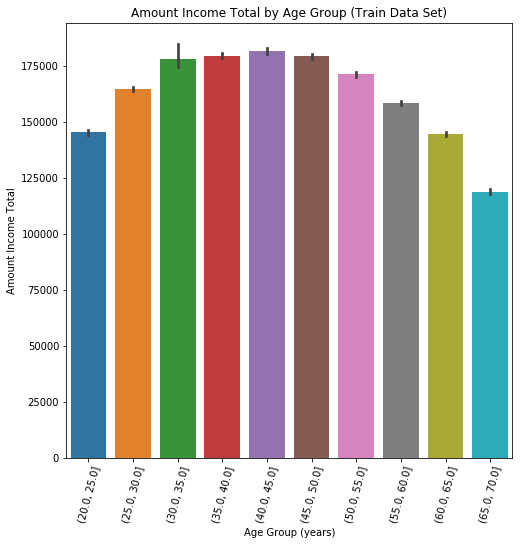

In [40]:
import seaborn as sns


plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['bins_YEARS_BIRTH']
py = app_train["AMT_INCOME_TOTAL"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Age Group (years)');
plt.ylabel('Amount Income Total');
plt.title('Amount Income Total by Age Group (Train Data Set)');


In [41]:
# 表示 30~50 的年收入最高？約在 $175k ?

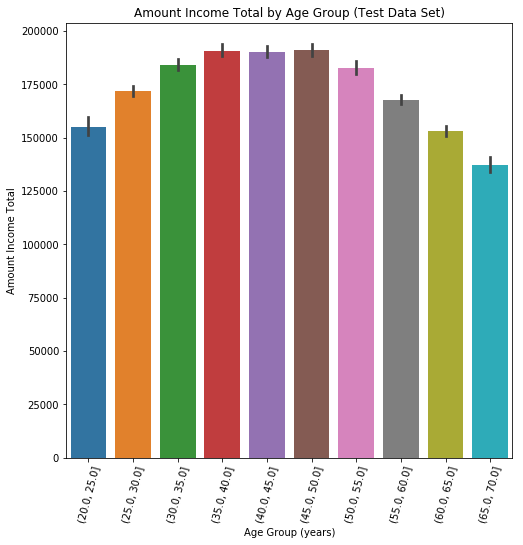

In [42]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_test['bins_YEARS_BIRTH']
py = app_test["AMT_INCOME_TOTAL"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Age Group (years)');
plt.ylabel('Amount Income Total');
plt.title('Amount Income Total by Age Group (Test Data Set)');

In [43]:
# Test Data Set 表示 30~50 的年收入最高？約在 $185k ?

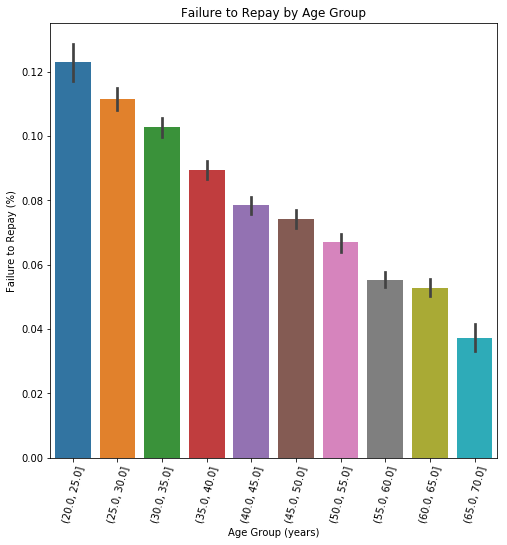

In [44]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['bins_YEARS_BIRTH']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Age Group (years)');
plt.ylabel('Failure to Repay (%)');
plt.title('Failure to Repay by Age Group');

In [45]:
# 表示年紀越大，違約比例越低？

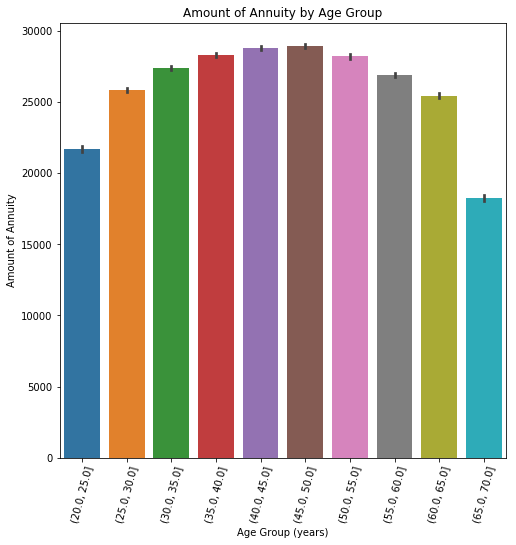

In [47]:

plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['bins_YEARS_BIRTH']
py = app_train["AMT_ANNUITY"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Age Group (years)');
plt.ylabel('Amount of Annuity');
plt.title('Amount of Annuity by Age Group');

In [48]:
# 每年年金數量，跟收入成正比?

In [50]:
app_train['bins_AMT_INCOME_TOTAL'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], q = 10)

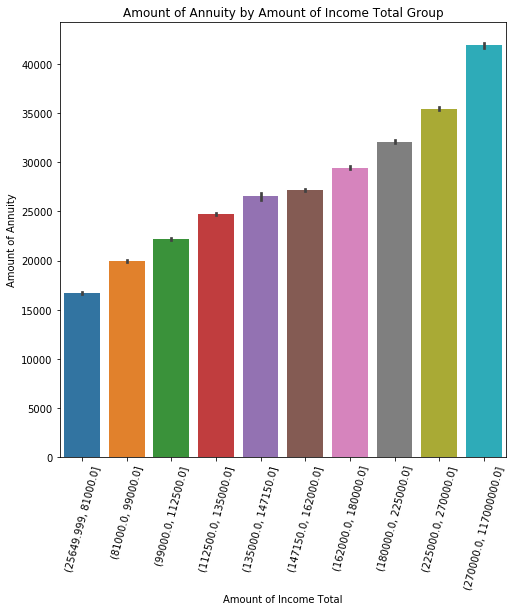

In [52]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['bins_AMT_INCOME_TOTAL']
py = app_train["AMT_ANNUITY"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Amount of Income Total');
plt.ylabel('Amount of Annuity');
plt.title('Amount of Annuity by Amount of Income Total Group');

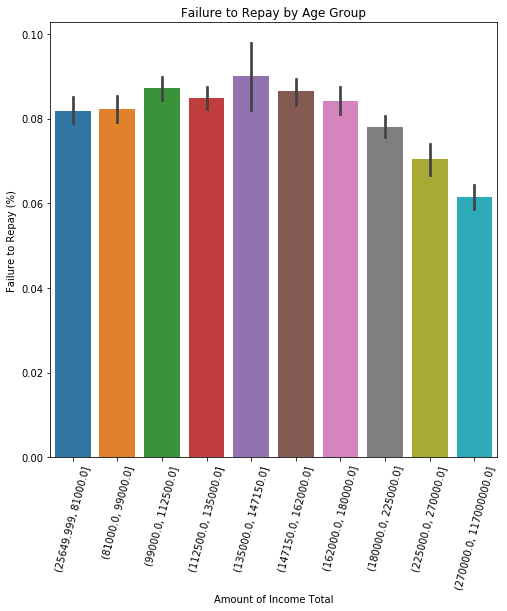

In [54]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['bins_AMT_INCOME_TOTAL']
py = app_train["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Amount of Income Total');
plt.ylabel('Failure to Repay (%)');
plt.title('Failure to Repay by Age Group');

In [55]:
# 收入最高的比較不容易違約，但是收入較低的也不容易違約？